# Random forest

## Importing libraries

In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

## Loading the data

In [2]:
df = pd.read_csv('../data/clean.csv')

In [3]:
df.head()

,round,value,category,clue,correct_response,air_date,is_daily_double,host_commented,is_irregular_value,is_common_category
0,1,200,SUDDENLY SUDAN,From 1899 to 1956 Sudan was controlled by Egyp...,England (Great Britain),2001-11-26,0,0,0,0
1,1,400,SUDDENLY SUDAN,In 1995 this former U.S. president oversaw a c...,Jimmy Carter,2001-11-26,0,0,0,0
2,1,600,SUDDENLY SUDAN,The Atbarah River joins this river in northern...,the Nile,2001-11-26,0,0,0,0
3,1,800,SUDDENLY SUDAN,This Sudanese city of about 1 million was foun...,Khartoum,2001-11-26,0,0,0,0
4,1,1400,SUDDENLY SUDAN,"Handling most of the country's foreign trade, ...",the Red Sea,2001-11-26,1,0,1,0


In [4]:
df.shape

(174872, 10)

## Train/test split

In [5]:
features = ['round', 'value', 'host_commented', 'is_irregular_value', 'is_common_category']

X = df[features]
y = df['is_daily_double']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## Fitting a model

In [6]:
params = {
    'n_estimators': [100, 150],
    'max_depth': [1, 2, None],
}

In [7]:
gs = GridSearchCV(RandomForestClassifier(), params, cv=5)

In [8]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [9]:
gs.best_params_

{'max_depth': None, 'n_estimators': 100}

In [10]:
print('Train score:', gs.score(X_train, y_train))
print('Test score:', gs.score(X_test, y_test))
print('Baseline accuracy:', 1 - y.mean())

Train score: 0.9814721624959971
Test score: 0.981563657989844
Baseline accuracy: 0.9479733748112905


## What was the model most likely to get wrong?

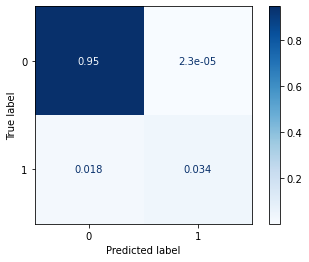

In [11]:
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='all', cmap='Blues');